#Punto 1 Taller 10

##Maria Camila Remolina Gutierrez

Escriba un programa que haga graficas (2D) de la distribucion angular de radiacion para una particula relativista con acelaracion constante en dos casos: aceleracion perpendicular a la velocidad y aceleracion paralela a la velocidad. 

Sabemos que: 

##$$\frac{dP}{d\Omega} = \frac{\alpha \hbar}{4 \pi} \frac{|\hat{n} \times (\hat{n}-\vec{\beta}) \times \dot{\vec{\beta}}|^2}{(1- \hat{n} \cdot \vec{\beta})^5}$$

Entonces para cada caso se puede escribir lo siguiente:

##$$\frac{dP_{a \perp v}}{d\Omega} = \frac{\alpha \hbar c}{4 \pi R^2} \frac{\beta^4}{(1-\beta\cos{\theta})^3} [1-\frac{\sin^2{\theta}\cos^2{\phi}}{\gamma^2(1-\beta\cos{\theta})^2}]$$

##$$\frac{dP_{a \parallel v}}{d\Omega} = \frac{\alpha \hbar c}{4 \pi R^2} \frac{\beta^4 \sin^2{\theta}}{(1-\beta\cos{\theta})^5} $$

Donde $R$, $\theta$ y $\phi$ son los angulos de coordenadas esfericas, siendo $\theta$ es azimutal y $\phi$ el polar.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
def aperv(beta,theta,phi):
    gamma = 1/sqrt(1-beta**2)
    return (beta**4)*(1-(sin(theta)*sin(theta)*cos(phi)*cos(phi))/(gamma*gamma*(1-beta*cos(theta))*(1-beta*cos(theta))))/((1-beta*cos(theta))**3)

def aparv(beta, theta):
    return (beta**4)*sin(theta)*sin(theta)/((1-beta*cos(theta))**5)

In [4]:
ths = linspace(0,2*pi,1000)

def darxyper(phi):
    r = aperv(0.9, ths, phi)

    x = r*sin(ths)
    y = r*cos(ths)
    
    return x,y

def darxypar(beta):
    r = aparv(beta, ths)

    x = r*sin(ths)
    y = r*cos(ths)
    
    return x,y

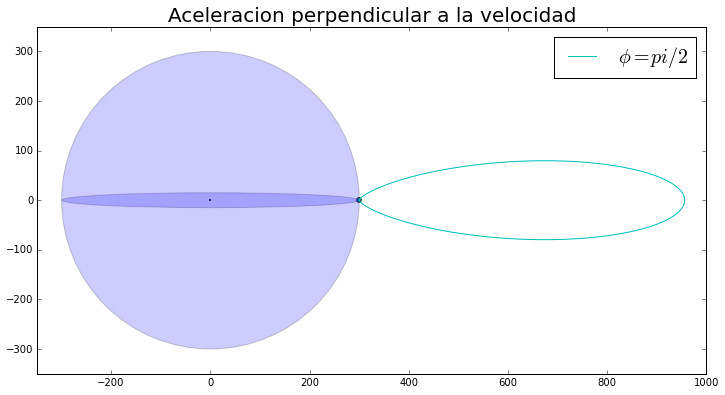

In [5]:
from matplotlib.patches import Ellipse

ell = Ellipse(xy=[0,0], width=600, height=30, angle=0)
ell2 = Ellipse(xy=[0,0], width=600, height=600, angle=0)

fig = figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='equal')

ax.add_artist(ell)
ell.set_alpha(0.2)
ax.add_artist(ell2)
ell2.set_alpha(0.2)
ax.scatter(0,0,s=1,c='c')

x,y = darxyper(pi/2)
ax.plot(y+300,x, c='c', label="$\phi = pi/2$")

ax.scatter(300,0,c='c')

legend(fontsize=20)

ax.set_xlim(-350, 1000)
ax.set_ylim(-350, 350)

ax.set_title("Aceleracion perpendicular a la velocidad", fontsize=20)

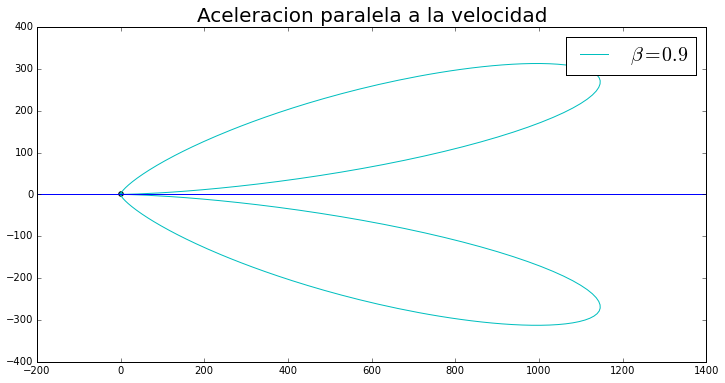

In [6]:
fig = figure(figsize=(12,12))
ax = fig.add_subplot(111, aspect='equal')

x,y = darxypar(0.9)
ax.plot(y,x, c='c', label=r"$\beta = 0.9$")

ax.scatter(0,0,c='c')

ax.axhline(y=0, xmin=0, xmax=1400)

legend(fontsize=20)

#ax.set_xlim(-350, 1000)
#ax.set_ylim(-350, 350)

ax.set_title("Aceleracion paralela a la velocidad", fontsize=20)

In [7]:
#Fuentes:

#http://www.phys.ufl.edu/~avery/course/4390/f2013/lectures/synchrotron_radiation.pdf